<center>
  <img style="border-radius: 30px;" src="https://i.imgur.com/5msv87x.jpg" alt="Car Prediction ML & DL">
</center>

<p style="text-align:center;"><span style="font-size:48px;"><span style="color:SlateBlue;"><span style="font-family:Fantasy;"> Hello everyone </span> </span>  </span></p>

<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px">Table of Content</p>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


* **[1. Import Library's](#import)**
   
* **[2. Imput Data](#Input)**  
    
* **[3. Pre Processing ](#PreProcessing)**
   - [Scaling](#Scaling)
  
* **[4. EDA ](#EDA)**  

   - [correlation](#correlation) 
   - [Pair Plot](#PP)
   
* **[5. Split Data ](#Split)**

* **[6. K Neighbors Regressor ](#KNN)**
   
* **[7. SVM](#SVM)** 
    
* **[8. Random Forest](#RF)** 
  
* **[9. Result](#RS)** 
        
    


<a id="import"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Import Libraries </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from plotly.subplots import make_subplots


warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="Input"></a>
<p id="2" style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Input Data </p>

In [2]:
data = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv")
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<a id="PreProcessing"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Pre-Processing </p>

In [4]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
data = data.dropna(axis=0)

def convertToNumber(s:str):
    d = ""
    for i in list(s):
        if i.isdigit():
            d += i
    return eval(d)


data["mileage"] = data["mileage"].apply(convertToNumber)
data["engine"] = data["engine"].apply(convertToNumber)
data["max_power"] = data["max_power"].apply(convertToNumber)
        

In [6]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [8]:
data = data.drop(['seller_type','torque','name','owner'],axis=1)
data.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Manual,234,1248,74,5.0
1,2014,370000,120000,Diesel,Manual,2114,1498,10352,5.0
2,2006,158000,140000,Petrol,Manual,177,1497,78,5.0
3,2010,225000,127000,Diesel,Manual,230,1396,90,5.0
4,2007,130000,120000,Petrol,Manual,161,1298,882,5.0


In [9]:
data.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [10]:
data_new = pd.get_dummies(data=data, columns=['fuel'], drop_first=True, dtype=int)

In [11]:
data_new.head()

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,Manual,234,1248,74,5.0,1,0,0
1,2014,370000,120000,Manual,2114,1498,10352,5.0,1,0,0
2,2006,158000,140000,Manual,177,1497,78,5.0,0,0,1
3,2010,225000,127000,Manual,230,1396,90,5.0,1,0,0
4,2007,130000,120000,Manual,161,1298,882,5.0,0,0,1


In [12]:
data_new['transmission'] = data_new['transmission'].replace({'Automatic': 1, 'Manual': 0})
data_new.head()

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,0,234,1248,74,5.0,1,0,0
1,2014,370000,120000,0,2114,1498,10352,5.0,1,0,0
2,2006,158000,140000,0,177,1497,78,5.0,0,0,1
3,2010,225000,127000,0,230,1396,90,5.0,1,0,0
4,2007,130000,120000,0,161,1298,882,5.0,0,0,1


<a id="Scaling"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Scaling </p>


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
mmScaler = MinMaxScaler()
mmScaler_y = MinMaxScaler()

label_enc = LabelEncoder()

x = data_new[['year', 'km_driven','transmission', 'mileage', 'engine', 'max_power', 'seats', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']].values
y = data_new[['selling_price']].values


In [14]:
x[:,0] = label_enc.fit_transform(x[:,0])
x = mmScaler.fit_transform(x)
y = mmScaler_y.fit_transform(y)

<a id="EDA"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> EDA : Exploratory Data Analysis </p>


In [15]:
import plotly.graph_objects as go
correlation_matrix = data_new.corr()

corr = go.Heatmap(
    z = correlation_matrix.values,
    x = correlation_matrix.columns,
    y = correlation_matrix.columns,
    colorscale='RdYlBu',
    colorbar=dict(title='Correlation')
)

layout = go.Layout(
    title='Heatmap of Correlation',
    xaxis=dict(title='Columns'),
    yaxis=dict(title='Columns'),
    height= 800
)

fig = go.Figure(data=corr, layout=layout)
fig.show()

<a id="correlation"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> correlation </p>


In [16]:
correlations = data_new.corrwith(data_new['selling_price'])
correlations

year             0.412302
selling_price    1.000000
km_driven       -0.222158
transmission     0.590269
mileage          0.098988
engine           0.455682
max_power        0.137042
seats            0.041617
fuel_Diesel      0.204831
fuel_LPG        -0.035978
fuel_Petrol     -0.195074
dtype: float64

<a id="PP"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Pair Plot </p>


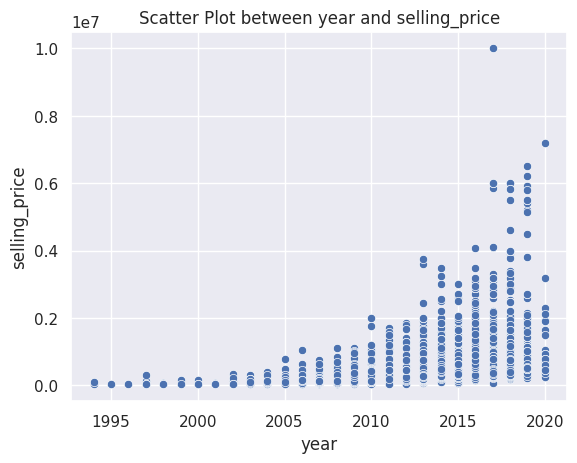

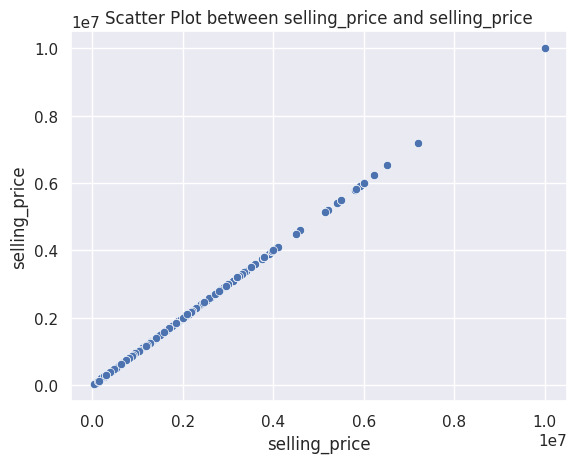

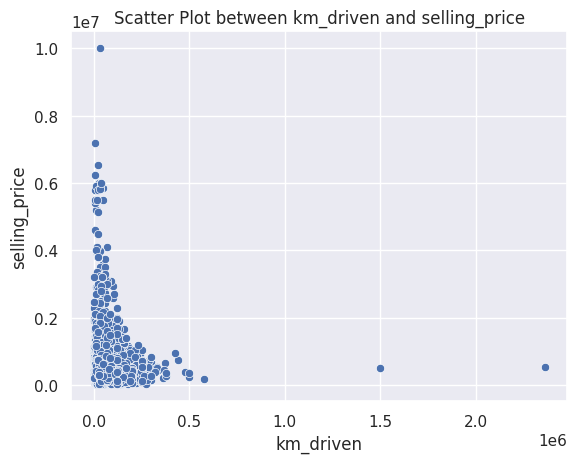

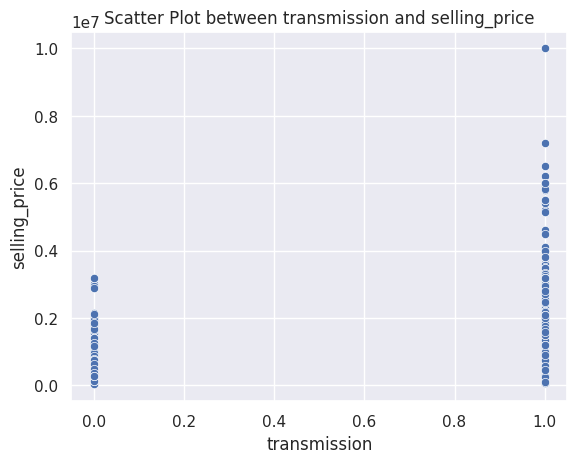

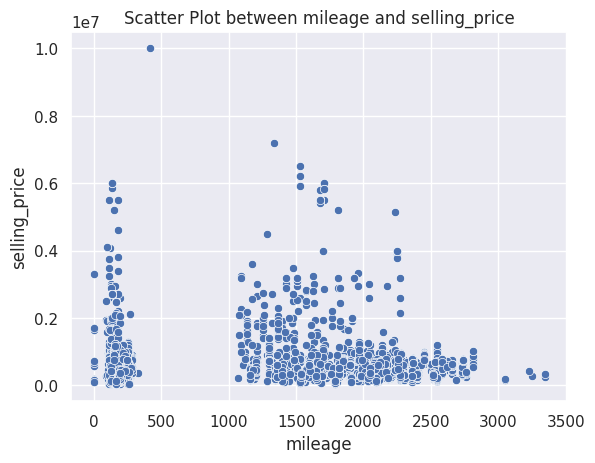

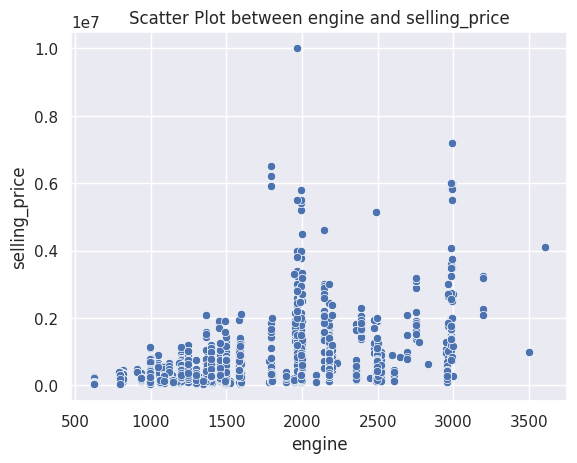

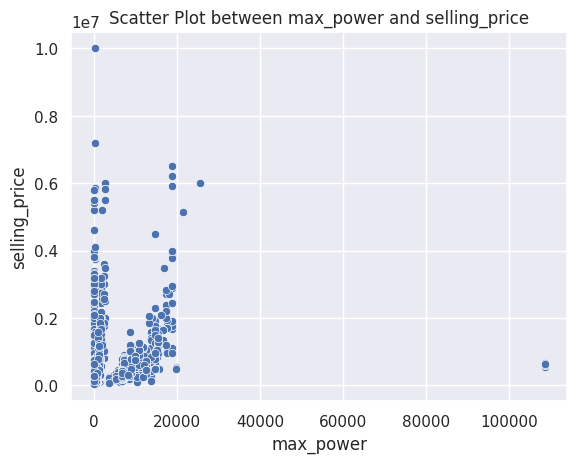

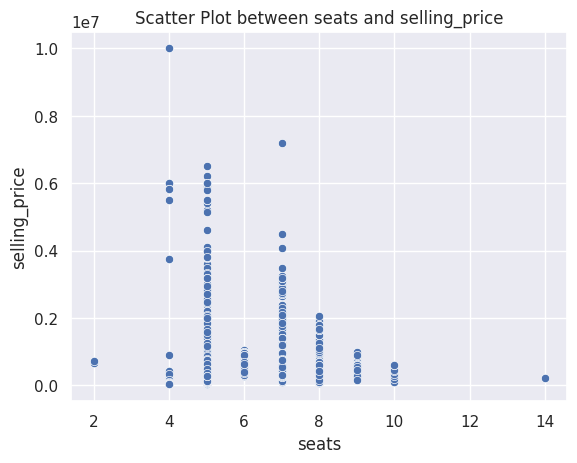

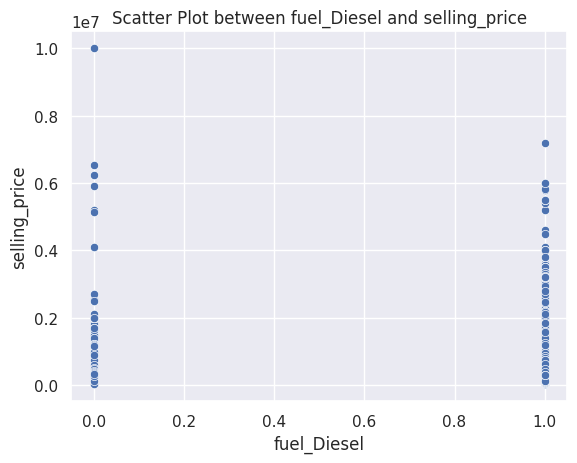

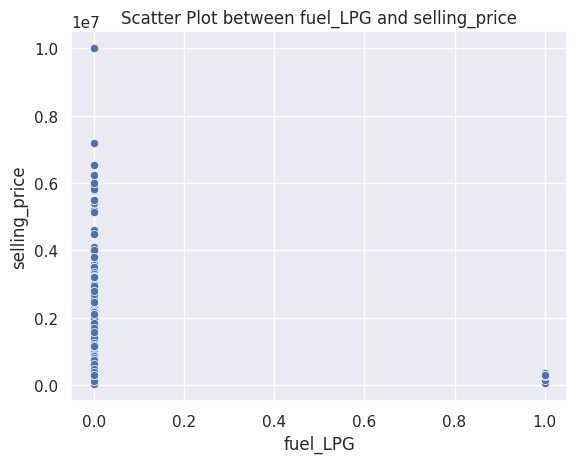

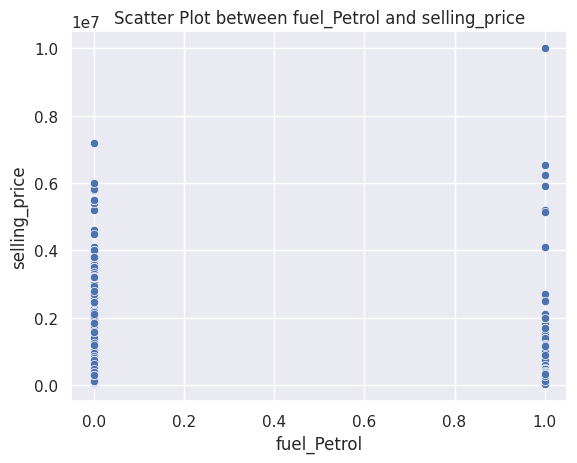

In [17]:
for column in data_new.columns:
    sns.scatterplot(data=data_new, x=column, y='selling_price')
    plt.title(f"Scatter Plot between {column} and selling_price")
    plt.show()

<a id="Split"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Split Data </p>


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

print(f"size train : x: {X_train.shape}   ->  y: {y_train.shape}")
print(f"size test : x: {X_test.shape}   ->  y: {y_test.shape}")


size train : x: (5534, 10)   ->  y: (5534, 1)
size test : x: (2372, 10)   ->  y: (2372, 1)


<a id="KNN"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> K Neighbors Regressor </p>


In [19]:
def rmse(pred,test):
  return np.sqrt(((pred - test) ** 2).mean())

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  r2_score, max_error,mean_squared_error


knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


rmse_knn = rmse(y_test, y_pred_knn)
r2_score_knn = r2_score(y_test, y_pred_knn)
max_error_knn = max_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"rmse : {rmse_knn}")
print(f"r2_score : {r2_score_knn}")
print(f"max_error : {max_error_knn}")
print(f"mean_squared_error : {mse_knn}")

rmse : 0.02138624523455597
r2_score : 0.9322983560995133
max_error : 0.40922764200324546
mean_squared_error : 0.0004573714852325679


<a id="SVM"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> SVM : support vector machine </p>

In [21]:
from sklearn.svm import SVR

SVM = SVR()

SVM.fit(X_train, y_train)

y_pred_svm = SVM.predict(X_test)


rmse_svm = rmse(y_test, y_pred_svm)
r2_score_svm = r2_score(y_test, y_pred_svm)
max_error_svm = max_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print(f"rmse : {rmse_svm}")
print(f"r2_score : {r2_score_svm}")
print(f"max_error : {max_error_svm}")
print(f"mean_squared_error : {mse_svm}")

rmse : 0.1176315943050326
r2_score : 0.751293106356551
max_error : 0.3018728682158652
mean_squared_error : 0.001680187286153398


<a id="RF"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Random Forest</p>

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = rmse(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test, y_pred_rf)
max_error_rf = max_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"rmse : {rmse_rf}")
print(f"r2_score : {r2_score_rf}")
print(f"max_error : {max_error_rf}")
print(f"mean_squared_error : {mse_rf}")

rmse : 0.1150157926361722
r2_score : 0.9550509043361459
max_error : 0.39022062284647707
mean_squared_error : 0.0003036622666630686


<a id="RS"></a>
<p style="background-image: url(https://i.imgur.com/zeWeG7y.jpg);font-family:Fantasy;font-size:120%;color:white;text-align:center;border-radius:20px 50px; padding:10px"> Result </p>

In [23]:
import pandas as pd
value ={
    'meter':["rmse", 'r2_score', 'max_error','mse'],
    'Random Forest': [rmse_rf ,r2_score_rf ,max_error_rf ,mse_rf],
    'SVR': [rmse_svm ,r2_score_svm ,max_error_svm ,mse_svm],
    'KNN': [rmse_knn ,r2_score_knn ,max_error_knn ,mse_knn],
}
Evaluate_model = pd.DataFrame(value)
Evaluate_model

,meter,Random Forest,SVR,KNN
0,rmse,0.115016,0.117632,0.021386
1,r2_score,0.955051,0.751293,0.932298
2,max_error,0.390221,0.301873,0.409228
3,mse,0.000304,0.001680,0.000457
